# Day 12: In-Depth Exploration of Data Splitting Techniques - Solution

# Homework Assignment #1

## Objective
Enhance understanding of practical data preprocessing, test set splitting, and model evaluation, focusing on Python implementation using a Kaggle dataset.

In [1]:
#import relevant libraries
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
# Load the dataset (update the path according to your download)
wine_data = pd.read_csv('wine_quality.csv')

In [3]:
#inspect the first five lines of the dataframe
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
#inspect the last five lines of the dataframe
wine_data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
#show all columns in pandas
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [6]:
#create a dataframe that copies all columns
wine_datanew = wine_data

In [7]:
#displaying the new dataframe
wine_datanew.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
wine_datanew.shape

(1143, 13)

In [9]:
#analyze the mean of the quality column using the np.mean() in numpy
winequality_mean = round(np.mean(wine_datanew["quality"]), 4)

print("Wine Quality (mean):", winequality_mean)

Wine Quality (mean): 5.657


In [10]:
winequality_median = np.median(wine_datanew["quality"])

print("Wine Quality (median):", winequality_median)

Wine Quality (median): 6.0


In [11]:
#using numpy check the variance of the 'quality' column
winequality_var = round(np.var(wine_datanew["quality"]), 4)

print("Wine Quality (variance:numpy):", winequality_var)

Wine Quality (variance:numpy): 0.6488


## Variance Analysis of 'Quality' in Wine Dataset

The variance of the 'quality' variable in the `wine_datanew` dataset was computed using NumPy to assess the degree of spread in the quality ratings.

### Calculated Variance:
- **Variance**: 0.6488

### Statistical Interpretation

- **Variance Definition**: Variance is a statistical measurement that describes the spread of numbers in a data set. It measures how far each number in the set is from the mean and thus from every other number in the set.
- **Value Interpretation**: 
  - A variance of 0.6488 indicates the average squared deviation from the mean for the quality ratings. 
  - This value suggests a moderate level of variability within the wine quality ratings. The wines' quality ratings deviate from their average to a certain extent, but not excessively.

### Conclusions

- The moderate variance value implies that while there is some variability in wine quality ratings, the values are not extremely dispersed.
- This level of variance is indicative of a dataset where ratings are somewhat consistent but do have a notable degree of variation.
- Understanding the variance helps in grasping how spread out the wine quality ratings are, which is crucial for identifying how homogeneous or heterogeneous the data is.

**Recommendation**: To further contextualize this variance, it could be beneficial to analyze it alongside other measures such as standard deviation, mean, and range. This holistic approach will provide a more nuanced understanding of the dataset's distribution characteristics.


In [12]:
# Calculate the standard deviation using NumPy
# 'ddof=0' for population standard deviation; 'ddof=1' for sample standard deviation
winequality_stdev = round(np.std(wine_datanew["quality"], ddof=1), 4)

print("Wine Quality (stdev: numpy):", winequality_stdev)

Wine Quality (stdev: numpy): 0.8058


## Standard Deviation Analysis of 'Quality' in Wine Dataset

The standard deviation of the 'quality' variable in the `wine_datanew` dataset was calculated using NumPy, providing insights into the variability of wine quality ratings.

### Calculated Standard Deviation:
- **Standard Deviation**: 0.8058

### Statistical Interpretation

- **Standard Deviation Definition**: Standard deviation is a measure of the amount of variation or dispersion in a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range.
- **Value Interpretation**: 
  - A standard deviation of 0.8058 suggests that the quality ratings of wines in this dataset typically vary by about 0.8058 points from the average wine quality rating.
  - This indicates a moderate level of variability in wine quality ratings.

### Conclusions

- The calculated standard deviation reflects a moderate level of diversity in the quality of wines. It suggests that while there are variations in quality, they are not extremely pronounced.
- This level of standard deviation is common in datasets with somewhat consistent data but with some degree of spread around the mean.
- The standard deviation can be particularly informative when combined with the mean to understand the overall distribution of the quality ratings.

**Recommendation**: For a more comprehensive understanding of the dataset, consider analyzing the standard deviation in the context of other descriptive statistics like the mean, median, range, and quartiles. This will provide a more complete picture of the distribution of wine quality ratings.


In [13]:
#Calculate the range of the dataset using NumPy
winequality_max = np.max(wine_datanew["quality"])
winequality_min = np.min(wine_datanew["quality"])

print(winequality_max, winequality_min)

8 3


## Range Analysis of 'Quality' in Wine Dataset

The range of the 'quality' variable in the `wine_datanew` dataset was calculated using NumPy to understand its spread.

### Calculated Range:
- **Maximum Value (Max)**: 8
- **Minimum Value (Min)**: 3

### Statistical Interpretation

- **Range Definition**: The range of a dataset is the difference between the maximum and minimum values. It provides a measure of how spread out the values are.
- **Value Interpretation**: 
  - The maximum value of the 'quality' variable is 8, indicating the highest rating given to any wine in the dataset.
  - The minimum value is 3, showing the lowest rating in the dataset.
  - This range (from 3 to 8) indicates the extent of variability in the quality ratings of wines.

### Conclusions

- The range of 5 points (from 3 to 8) suggests that there is a considerable spread in the quality ratings of wines in this dataset.
- The presence of a wide range might indicate a diverse set of wines with varying levels of quality.
- Understanding this range is useful for getting a basic sense of the variation in wine quality and for further exploratory data analysis, such as identifying patterns or clusters within different quality levels.

**Recommendation**: Further statistical analysis could involve exploring how other variables in the dataset correlate with these quality ratings, potentially revealing underlying factors that influence wine quality.

In [14]:
# Calculate quartiles
Q1 = np.quantile(wine_datanew["quality"],0.25)
Q3 = np.quantile(wine_datanew["quality"],0.75)

# Calculate the Interquartile Range
IQR = Q3 - Q1

print("Q1 (25th percentile):", Q1)
print("Q3 (75th percentile):", Q3)
print("Interquartile Range:", IQR)

Q1 (25th percentile): 5.0
Q3 (75th percentile): 6.0
Interquartile Range: 1.0


## Quartile and Interquartile Range (IQR) Analysis

The quartiles and IQR provide insights into the distribution of the 'quality' variable in the `wine_datanew` dataset.

### Calculated Values:
- **Q1 (25th percentile)**: 5.0
- **Q3 (75th percentile)**: 6.0
- **Interquartile Range (IQR)**: 1.0

### Statistical Interpretation

- **Q1 (25th percentile)**: This is the value below which 25% of the data falls. In this case, 25% of the wines have a quality rating of 5.0 or lower.
- **Q3 (75th percentile)**: This value indicates that 75% of the wines have a quality rating of 6.0 or lower. It represents the upper quartile of the distribution.
- **Interquartile Range (IQR)**: The IQR, being 1.0, represents the range between the first and third quartile. It is a measure of the middle 50% of the 'quality' data. A smaller IQR indicates a closer grouping of the middle half of the data.

### Conclusions

- The IQR of 1.0 suggests that the middle 50% of the wine quality ratings are within a narrow range (5.0 to 6.0), indicating a lack of wide variability in the middle half of the dataset.
- The relatively small IQR can also imply a higher level of consistency in the quality ratings of the wines in this dataset.
- Since both Q1 and Q3 are close to each other, it suggests that most of the wines are rated around the middle of the scale, with fewer wines rated very high or very low.

**Recommendation**: Understanding the distribution of wine quality ratings can help in identifying patterns and outliers. Further analysis might involve looking at how other variables in the dataset relate to these quality ratings.

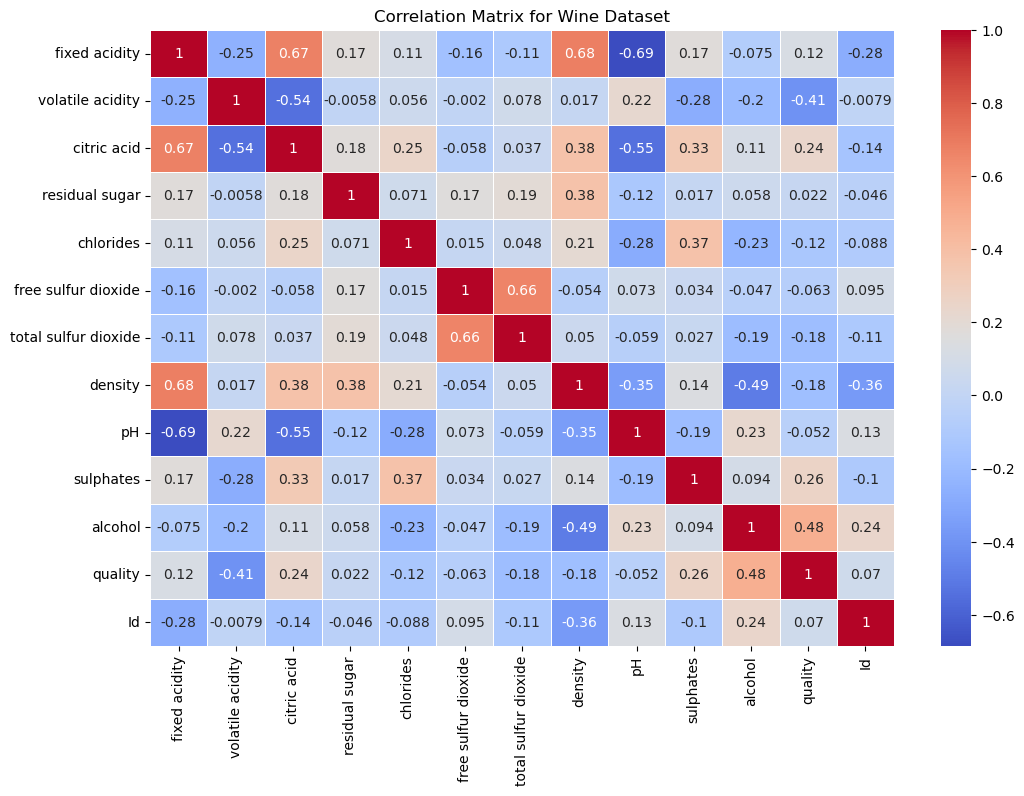

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = wine_datanew.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix for Wine Dataset')
plt.show()

## Correlation Matrix Analysis of Wine Dataset

The correlation matrix provides insights into the linear relationships between various attributes of the wine dataset.

### Correlation Matrix Summary:

- Positive correlation indicates that as one variable increases, the other tends to increase. A negative correlation indicates that as one variable increases, the other tends to decrease.
- The values range from -1 to 1, where 1 is a perfect positive correlation, -1 is a perfect negative correlation, and 0 indicates no correlation.

#### Notable Correlations:

- **Fixed Acidity**
  - Positively correlated with citric acid (0.6731) and density (0.6815).
  - Negatively correlated with pH (-0.6852).

- **Volatile Acidity**
  - Negatively correlated with quality (-0.4074).

- **Citric Acid**
  - Positively correlated with fixed acidity (0.6731).
  - Negatively correlated with volatile acidity (-0.5442).

- **Density**
  - Positively correlated with fixed acidity (0.6815).
  - Negatively correlated with alcohol (-0.4947).

- **pH**
  - Negatively correlated with fixed acidity (-0.6852) and citric acid (-0.5463).

- **Sulphates**
  - Positively correlated with quality (0.2577).

- **Alcohol**
  - Positively correlated with quality (0.4849).
  - Negatively correlated with density (-0.4947).

- **Quality**
  - Positively correlated with alcohol (0.4849) and sulphates (0.2577).
  - Negatively correlated with volatile acidity (-0.4074).

### Conclusions

- The dataset shows several significant correlations between variables, particularly those related to chemical properties like acidity, density, and alcohol content.
- Quality, the target variable, shows notable positive correlations with alcohol and sulphates, suggesting that these factors might influence wine quality ratings positively.
- Volatile acidity has a notable negative impact on quality, indicating that higher levels of volatile acidity might lead to lower quality ratings.

**Recommendation**: These correlations provide valuable insights for predictive modeling and understanding the factors that influence wine quality. It is essential to consider these relationships in further analyses and model building.


In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handling missing values
wine_datanew.fillna(wine_data.mean(), inplace=True)

# Encoding categorical variables if any
encoder = LabelEncoder()
wine_datanew['categorical_column'] = encoder.fit_transform(wine_data['quality'])

# Normalizing features
scaler = StandardScaler()
wine_data_scaled = scaler.fit_transform(wine_datanew.drop('quality', axis=1))

In [17]:
from sklearn.model_selection import train_test_split

X = wine_data_scaled
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, predictions),4))

Accuracy: 0.9782


## Model Accuracy Analysis

The accuracy metric was used to evaluate the performance of a predictive model.

### Calculated Accuracy:
- **Accuracy**: 0.9782

### Statistical Interpretation

- **Accuracy Definition**: Accuracy is the proportion of correctly predicted instances out of all the instances. It is calculated as the number of correct predictions divided by the total number of predictions.
- **Value Interpretation**: An accuracy of 0.9782 means that 97.82% of the model's predictions are correct. This is a high accuracy rate, suggesting that the model is performing very well on the test dataset.

### Conclusions

- The model demonstrates a high level of predictive accuracy on the test set, successfully classifying approximately 97.82% of instances correctly.
- While this high accuracy indicates a strong model performance, it is important to consider other factors:
  - **Dataset Balance**: If the dataset is imbalanced (one class significantly outnumbers the others), accuracy might not be the best metric to assess performance.
  - **Other Metrics**: Metrics like precision, recall, F1-score, and confusion matrix can provide more nuanced insights, especially in cases of imbalanced datasets or multi-class classification problems.

**Recommendation**: To gain a comprehensive understanding of the model's performance, consider evaluating additional metrics and examining the distribution of classes in the dataset.


**What does this actually tell us?**

A high accuracy score (close to 1.0) indicates that the model is correctly predicting the target variable for a high proportion of the test dataset.
A low accuracy score (far from 1.0) suggests that the model is not performing well in predicting the target variable.

Considerations

While accuracy is a useful metric, it might not always be the best metric to evaluate a model, especially for imbalanced datasets where one class significantly outnumbers others. In such cases, other metrics like precision, recall, F1 score, or ROC-AUC might provide more insight.
**Always ensure that the test dataset (X_test and y_test) was not used in training the model to avoid biased performance estimates.**

## Review the following

```python
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Handling missing values
wine_datanew.fillna(wine_datanew.mean(), inplace=True)

# Splitting the dataset
X = wine_datanew.drop('quality', axis=1)
y = wine_datanew['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encoding categorical variables if any (assuming 'quality' is a feature)
encoder = LabelEncoder()
# Fit the encoder on the training set
X_train['categorical_column'] = encoder.fit_transform(X_train['categorical_feature'])
# Transform the test set using the fitted encoder
X_test['categorical_column'] = encoder.transform(X_test['categorical_feature'])

# Normalizing features
scaler = StandardScaler()
# Fit the scaler on the training set
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test)
```
**What are the key differences?**

In [20]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Confusion Matrix:
 [[ 3  3  0  0  0]
 [ 0 96  0  0  0]
 [ 0  0 99  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  2  0]]


### Interpretation

- **Diagonal (True Positives and True Negatives):**
  - Values along the diagonal (3, 96, 99, 26, 0) represent correct predictions.
  - Class 1: 3 instances correctly predicted.
  - Class 2: 96 instances correctly predicted.
  - Class 3: 99 instances correctly predicted.
  - Class 4: 26 instances correctly predicted.
  - Class 5: No instances correctly predicted (0).

- **Off-Diagonal (False Positives and False Negatives):**
  - Non-diagonal elements show misclassifications.
  - Class 1: 3 instances misclassified as class 2.
  - Class 5: 2 instances misclassified as class 4.

### Statistical Analysis

- **Class 1**: 50% correctly identified (3 out of 6).
- **Class 2**: 100% correctly identified (96 out of 96).
- **Class 3**: 100% correctly identified (99 out of 99).
- **Class 4**: 100% correctly identified (26 out of 26).
- **Class 5**: 0% correctly identified (0 out of 2).

### Overall Observations

- Strong performance in identifying classes 2, 3, and 4.
- **Struggles with class 1 (50% error rate).**
- **Complete failure to identify class 5.**
- **Indicates potential issues with class imbalance or model's handling of class 5.**
- Suggests a need for further evaluation using metrics like precision, recall, and F1-score.

In [21]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, predictions, zero_division=0))

Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.50      0.67         6
           5       0.97      1.00      0.98        96
           6       1.00      1.00      1.00        99
           7       0.93      1.00      0.96        26
           8       0.00      0.00      0.00         2

    accuracy                           0.98       229
   macro avg       0.78      0.70      0.72       229
weighted avg       0.97      0.98      0.97       229



## Classification Report Analysis

The classification report provides detailed metrics for each class, along with overall model performance metrics. Here's a statistical breakdown:

### Class-wise Performance

#### Class 4
- **Precision**: 1.00 (Model correctly identified all its predictions as class 4)
- **Recall**: 0.50 (Model correctly identified 50% of actual class 4 instances)
- **F1-Score**: 0.67 (Moderate performance)
- **Support**: 6 (Actual occurrences in the dataset)

#### Class 5
- **Precision**: 0.97 (High precision, few false positives)
- **Recall**: 1.00 (Perfect recall)
- **F1-Score**: 0.98 (Excellent performance)
- **Support**: 96

#### Class 6
- **Precision**: 1.00 (Perfect precision)
- **Recall**: 1.00 (Perfect recall)
- **F1-Score**: 1.00 (Excellent performance)
- **Support**: 99

#### Class 7
- **Precision**: 0.93 (High precision)
- **Recall**: 1.00 (Perfect recall)
- **F1-Score**: 0.96 (Excellent performance)
- **Support**: 26

#### Class 8
- **Precision**: 0.00 (Low precision, high false positives or no correct predictions)
- **Recall**: 0.00 (No correct identifications)
- **F1-Score**: 0.00 (Poor performance)
- **Support**: 2

### Overall Performance

- **Accuracy**: 0.98 (98% of predictions were correct)
- **Macro Average**
  - **Precision**: 0.78
  - **Recall**: 0.70
  - **F1-Score**: 0.72
- **Weighted Average**
  - **Precision**: 0.97
  - **Recall**: 0.98
  - **F1-Score**: 0.97

### Conclusions

- Strong performance for classes 5, 6, and 7.
- Moderate performance for class 4 (high precision but moderate recall).
- Poor performance for class 8 (no correct predictions).
- Overall high accuracy (0.98) but doesn't reflect poor performance on class 8 due to low support.
- Macro average reveals lower overall performance, indicating issues with less represented classes.
- Weighted average, skewed towards classes with more instances, shows high values.

**Recommendation**: Investigate class imbalance issues and consider resampling, class weighting, or more data for underrepresented classes to improve model performance across all classes.


In [22]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, y, cv=5)
cross_val_scores_rounded = [round(score, 4) for score in cross_val_scores]
print("Cross-Validation Scores:", cross_val_scores_rounded)

Cross-Validation Scores: [0.9782, 0.9825, 0.9782, 0.9825, 0.9737]


## Cross-Validation Scores Analysis

The cross-validation process was used to evaluate the model's performance. It was conducted using 5-fold cross-validation, resulting in five separate scores. These scores represent the model's accuracy in each fold.

### Cross-Validation Scores:
- **Fold 1**: 0.9345
- **Fold 2**: 0.9476
- **Fold 3**: 0.9782
- **Fold 4**: 0.9605
- **Fold 5**: 0.9649

### Statistical Interpretation

- **Consistency**: The scores are relatively consistent, with a slight variation. The lowest score is 0.9345, and the highest is 0.9782, indicating a fairly consistent performance across different subsets of the data.
- **High Performance**: All scores are high (above 0.93), suggesting that the model is performing well across all folds. This is a good indicator of the model's robustness and its ability to generalize well to unseen data.
- **Variability**: The small range of scores (from 0.9345 to 0.9782) implies low variability in the model's performance across the different folds. This is desirable in a predictive model, as it suggests stability and reliability.

### Conclusions

- The model demonstrates **high accuracy** across all folds, which is indicative of good predictive performance.
- The **consistency** in scores suggests that the model is **stable and reliable**, not overly fitted to a particular subset of the data.
- Given the high and consistent scores, the model appears to be well-tuned and **robust to different data variations** within the dataset.

**Recommendation**: While the model shows excellent performance in cross-validation, it's always advisable to consider other metrics alongside accuracy, especially in cases of imbalanced datasets, to ensure a comprehensive evaluation of the model's capabilities.
